In [ ]:
import config
import sys
sys.path.append('../util')
import os
from ultralytics import YOLO
from yoloutil import show_yolo_annotation, evaluate_yolo_segmentation

result_path = './yolo11'


In [ ]:
# convert_masks_to_yolo_txt(
#     input_dir=config.dataset_path,
#     class_names=["melanoma"]
# )

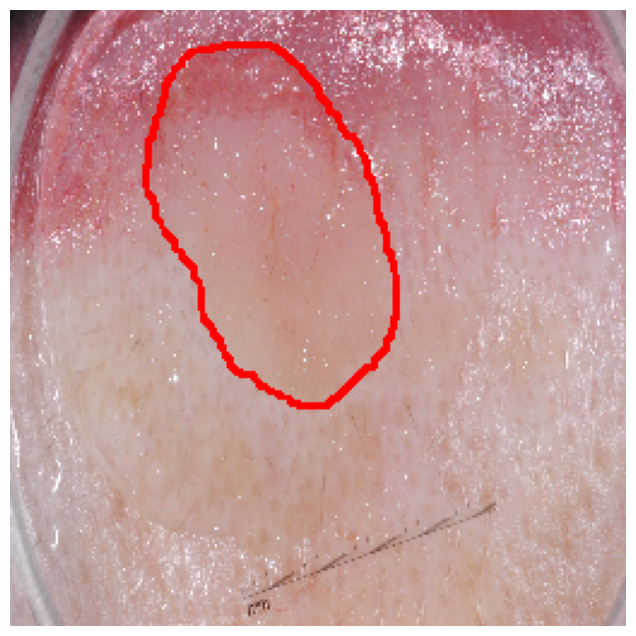

In [3]:
image_path = f"{config.dataset_path}/images/test/ISIC_0012169.png"
txt_path   = f"{config.dataset_path}/labels/test/ISIC_0012169.txt"

show_yolo_annotation(image_path, txt_path)


In [ ]:
model = YOLO("yolo11n-seg.pt")

results = model.train(data=f"{config.dataset_path}/data.yaml", 
                      epochs=300, 
                      imgsz=224, 
                      patience=20, 
                      project=result_path)

os.system('play -nq -t alsa synth 0.2 sine 600; play -nq -t alsa synth 0.2 sine 600')

In [ ]:
model = YOLO(f"{result_path}/train/weights/best.pt")

In [ ]:
import config
from DatasetReader import get_datasets


_, test_loader, _ = get_datasets(dataset_dir=config.dataset_path, 
                                resolution=config.dataset_resolution, 
                                batch_size=config.batch_size)

metrics = evaluate_yolo_segmentation(model, test_loader, num_classes=config.num_classes)
print(metrics)



In [ ]:
model.info(verbose=True)

YOLO11n-seg summary (fused): 113 layers, 2,834,763 parameters, 0 gradients, 9.6 GFLOPs


(113, 2834763, 0, 9.5717888)